In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import networkx as nx
import matplotlib.colors as mcolors

In [8]:
from matplotlib import rcParams
rcParams['axes.labelpad'] = 8.0

In [3]:
sns.set(context='paper', style="whitegrid", font_scale=3, font = 'serif')
%matplotlib inline
linewidth = 3

In [4]:
datafile='small_clusters.pt'
device = torch.device("cpu")

In [5]:
clusters = torch.load(datafile)

--------

In [9]:
Colors = []
for name, hex in mcolors.cnames.items():
    Colors.append(name)

In [10]:
colors_list = list(mcolors._colors_full_map.values())

In [11]:
len(Colors)

148

In [12]:
clrs = Colors + colors_list[200:252]

In [13]:
len(clrs)

200

In [40]:
def plot_graphx(graphx: nx.DiGraph, azim=-84, elev=10, colored = False):
    """
    Function for plotting shower
    """
    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.mplot3d.art3d import Line3DCollection
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(context='paper', style="whitegrid", font_scale=2, font = 'serif')
    
    x0, y0, z0 = [], [], []
    sx, sy = [], []
    #Signal = []
    Tracks = [] 
    for _, node in graphx.nodes(data=True):
        x0.append(node['features']['SX'])
        y0.append(node['features']['SY'])
        z0.append(node['features']['SZ'])
        sx.append(node['features']['TX'])
        sy.append(node['features']['TY'])
        #Signal.append(node['signal'])
        
    for i in range(200):
        Tracks.append(int(graphx.graph['showers_data'][i]['numtracks']))
        
    x0, y0, z0 = np.array(x0), np.array(y0), np.array(z0)
    sx, sy = np.array(sx), np.array(sy)

    x1 = x0 + dZ * sx
    y1 = y0 + dZ * sy
    z1 = z0 + dZ
    
    start_points = np.array([z0, y0, x0]).T.reshape(-1, 3)
    end_points = np.array([z1, y1, x1]).T.reshape(-1, 3)

    lc_0 = Line3DCollection(list(zip(start_points[:Tracks[0]], end_points[:Tracks[0]])),
                             alpha=0.9, lw=2)
    lc_last = Line3DCollection(list(zip(start_points[len(start_points)-Tracks[199]:], 
                                        end_points[len(start_points)-Tracks[199]:])),
                                alpha=0.9, lw=2)
    


    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca(projection='3d')
    ax.view_init(azim=azim, elev=elev)
    ax.add_collection3d(lc_0)
    ax.add_collection3d(lc_last)
        
    start = 0
    end = 0
    lc_list = []
    
    if colored: 
        for i in range(198):
            start += Tracks[i]
            end = start + Tracks[i+1]
            #print(start, end)

            lc = Line3DCollection(list(zip(start_points[start:end], 
                                           end_points[start:end])),
                                 colors = clrs[i], alpha=0.9, lw=2)

            ax.add_collection3d(lc)
   
    else: 
        for i in range(198):
            start += Tracks[i]
            end = start + Tracks[i+1]
            #print(start, end)

            lc = Line3DCollection(list(zip(start_points[start:end], 
                                           end_points[start:end])),
                                   alpha=0.9, lw=2)

            ax.add_collection3d(lc)


    ax.set_xlabel("z")
    ax.set_ylabel("y")
    ax.set_zlabel("x") 
    ax.set_xlim(z0.min(), z1.max())
    ax.set_ylim(y0.min(), y1.max())
    ax.set_zlim(x0.min(), x1.max())
    
    if colored: 
        plt.savefig("graph_colored.pdf", bbox_inches='tight')
    else: 
        plt.savefig("graph_blue.pdf", bbox_inches='tight')
    plt.show()

In [41]:
BT_Z_unique = np.array([     0.,   1293.,   2586.,   3879.,   5172.,   6465.,   7758.,
                          9051.,  10344.,  11637.,  12930.,  14223.,  15516.,  16809.,
                         18102.,  19395.,  20688.,  21981.,  23274.,  24567.,  25860.,
                         27153.,  28446.,  29739.,  31032.,  32325.,  33618.,  34911.,
                         36204.,  37497.,  38790.,  40083.,  41376.,  42669.,  43962.,
                         45255.,  46548.,  47841.,  49134.,  50427.,  51720.,  53013.,
                         54306.,  55599.,  56892.,  58185.,  59478.,  60771.,  62064.,
                         63357.,  64650.,  65943.,  67236.,  68529.,  69822.,  71115.,
                         72408.,  73701.])


BRICK_X_MIN = 0.
BRICK_X_MAX = 103000. # 10.3 cm
BRICK_Y_MIN = 0.
BRICK_Y_MAX = 128000. # 12.8 cm
SAFE_M = 3000.
dZ = 0.00205 # 0.0205 cm emulsion
DISTANCE = 1293.

kwargs = {'bins': 100, 'alpha': 0.8, 'normed': True}



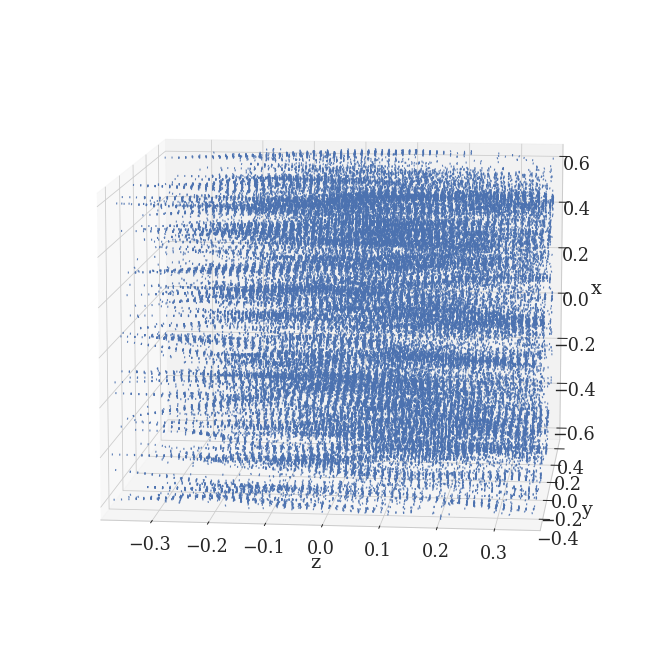

In [42]:
plot_graphx((clusters[0]['graphx']));

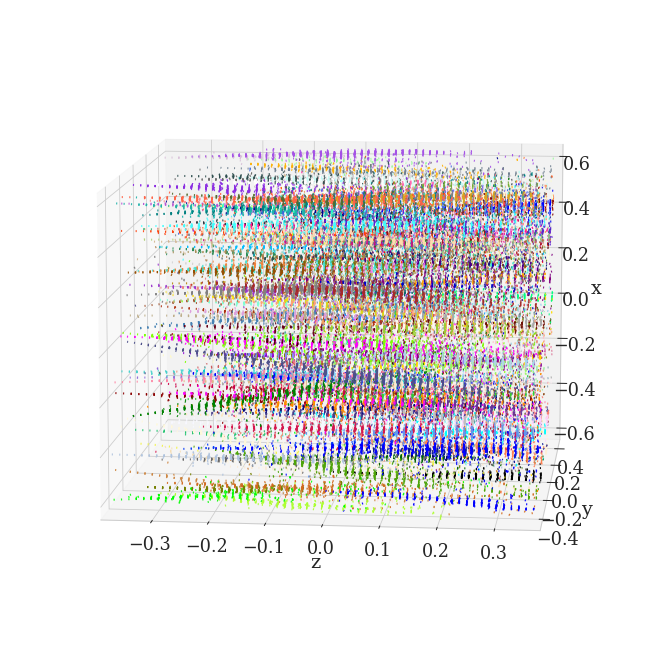

In [39]:
plot_graphx((clusters[0]['graphx']), colored = True);